# Lovoo Users Profiling
**Coded by ©Grace Nathania**

LOVOO is a leading online dating app in the German-speaking world founded in 2011. 

Users' data was fetched during spring 2015 (April to May) by Jeffrey Mabilama and published on his [Kaggle account](https://www.kaggle.com/jmmvutu/dating-app-lovoo-user-profiles).

To create the users profiling, we have to first do exploratory data analysis (EDA) in which we can understand the data deeper and clean the data to be used for the next step. 

In the rows of code below, k-Means clustering is used to segmentise the users who share the same behaviours;
* To determine the most optimised number of k, elbow method and silhouette score are used.
* To do deeper profiling, clustered data is analysed on Google Sheets using pivot tables. 
* To visualise the profiling, insights from Google Sheets are then visuliased and presented using Google Slides.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
def create_csv(df, filename):
    df_final = df.to_csv('/content/drive/MyDrive/Loovo/Cleaned Data/{}.csv'.format(filename), index = False) #sep='\t'
    return print("CSV export is done! File name: {}.csv".format(filename))

# 1. EDA

## 1.1 Data Loading
Data source: https://www.kaggle.com/jmmvutu/dating-app-lovoo-user-profiles

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Loovo/lovoo_v3_users_api-results.csv")
df.shape

(3992, 42)

In [5]:
df.head(1)

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,city,location,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,lang_count,lang_fr,lang_en,lang_de,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.0,4,8279,239,0,3,True,True,True,CH,Rothenburg,Rümlang,175.0,0,0,0,1,0,0,0,1,False,False,True,False,False,False,0,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3992 non-null   object 
 1   genderLooking           3992 non-null   object 
 2   age                     3992 non-null   int64  
 3   name                    3992 non-null   object 
 4   counts_details          3992 non-null   float64
 5   counts_pictures         3992 non-null   int64  
 6   counts_profileVisits    3992 non-null   int64  
 7   counts_kisses           3992 non-null   int64  
 8   counts_fans             3992 non-null   int64  
 9   counts_g                3992 non-null   int64  
 10  flirtInterests_chat     3992 non-null   bool   
 11  flirtInterests_friends  3992 non-null   bool   
 12  flirtInterests_date     3992 non-null   bool   
 13  country                 3992 non-null   object 
 14  city                    3706 non-null   

## 1.2 Data Visualisation and Cleaning

In [7]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd,crypt,isSystemProfile
count,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3946.000000,3992.000000,3992.000000,3992.0,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3.991000e+03,3992.000000,46.0,2.0
mean,21.991483,0.569409,4.786573,3705.467184,156.599699,2.335421,0.125501,207.230005,0.011774,0.011774,0.0,0.745992,0.238727,0.585421,0.022796,1.109719,0.219940,0.960671,1.428921e+09,0.003758,1.0,1.0
std,1.959481,0.326066,4.420238,6845.038330,377.650691,12.235699,1.238945,196.594017,0.107879,0.107879,0.0,0.435357,0.426359,0.492711,0.149270,0.582451,0.414258,0.194400,8.227151e+05,0.061191,0.0,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426592e+09,0.000000,1.0,1.0
25%,20.000000,0.310000,2.000000,383.000000,11.000000,0.000000,0.000000,83.875000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.428332e+09,0.000000,1.0,1.0
50%,22.000000,0.620000,4.000000,1222.000000,44.000000,0.000000,0.000000,172.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.428400e+09,0.000000,1.0,1.0
75%,24.000000,0.850000,6.000000,4063.250000,141.000000,0.000000,0.000000,317.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.429992e+09,0.000000,1.0,1.0
max,28.000000,1.000000,30.000000,164425.000000,9288.000000,241.000000,43.000000,6918.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.430647e+09,1.000000,1.0,1.0


In [8]:
def cal_max(col):
  fq = df[col].describe()['25%'] 
  tq = df[col].describe()['75%']
  iqr = tq-fq
  return (tq + 1.5*iqr)

In [9]:
def draw_boxplot(c):
  sns.boxplot(df[c], palette='dark')
  plt.title('BoxPlot for {}'.format(c))
  plt.show()

  # count outliers
  mv = cal_max(c)
  len_outlier = len(df[(df[c] > mv)])
  print("outliers for column",c,":",len_outlier)

### 1.2.1 age

In [10]:
age_gb = df.groupby(['age'])['userId'].count().reset_index().rename(columns = {'userId' : 'count'})

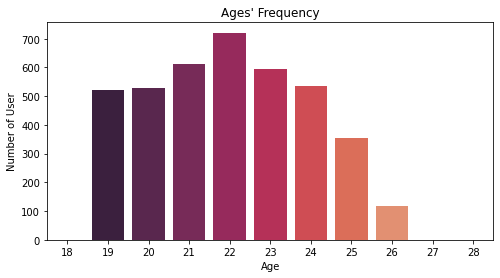

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(x=age_gb['age'], y=age_gb['count'], palette="rocket")
plt.title("Ages' Frequency")
plt.xlabel("Age")
plt.ylabel("Number of User")
plt.show()

In [12]:
# Removing users with age < 19 and age > 26
print("Before removal:",df.shape)
df = df[(df['age'] > 18)]
df = df[(df['age'] < 27)]
print("After removal:",df.shape)

Before removal: (3992, 42)
After removal: (3989, 42)


### 1.2.2 counts_details

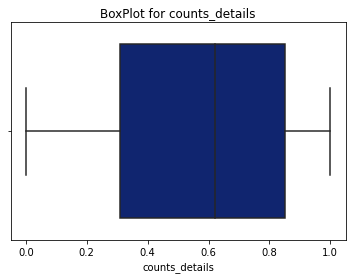

outliers for column counts_details : 0


In [13]:
draw_boxplot('counts_details') # no removal needed refering to the visualisation below

### 1.2.3 counts_pictures
number of pictures on the user's profile

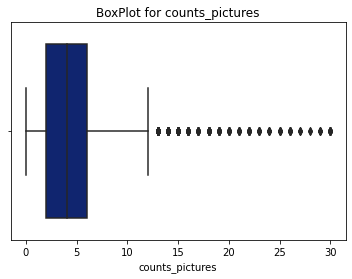

outliers for column counts_pictures : 239


In [14]:
draw_boxplot('counts_pictures')

In [15]:
# Removing outliers of counts_pictures
print("Removing outliers of counts_pictures\noriginal shape:",df.shape)
max_val = cal_max('counts_pictures')
df = df[df['counts_pictures'] < max_val]
print("after removal:", df.shape)

Removing outliers of counts_pictures
original shape: (3989, 42)
after removal: (3704, 42)


### 1.2.4 counts_profileVisits
number of clicks on this user (to see his/her full profile) from other user accounts.

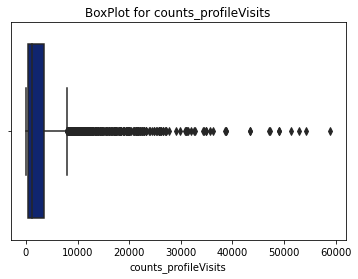

outliers for column counts_profileVisits : 376


In [16]:
draw_boxplot('counts_profileVisits')

In [17]:
# Based on visualisation, replace profileVisits > 290000 with mean
print("Rows with profileVisits > 29000: {} rows" .format(len(df[(df['counts_profileVisits'] > 29000)])))

# replace profileVisits > 29000 with mean
df['counts_profileVisits'] = np.where(df['counts_profileVisits'] > 29000, df['counts_profileVisits'].mean(), df['counts_profileVisits'])
print("replace profileVisits > 29000 with mean")
print("Rows with profileVisits > 29000: {} rows" .format(len(df[(df['counts_profileVisits'] > 29000)])))

Rows with profileVisits > 29000: 29 rows
replace profileVisits > 29000 with mean
Rows with profileVisits > 29000: 0 rows


### 1.2.5 counts_kisses
Number of unique user accounts that "liked" (called "kiss" on the platform) this user account.

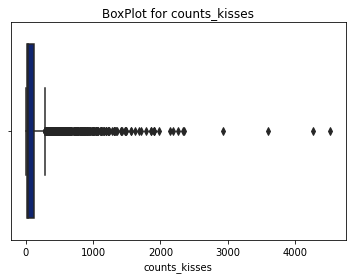

outliers for column counts_kisses : 383


In [18]:
draw_boxplot('counts_kisses')

In [19]:
# Based on visualisation, remove kisses > 2000 with means
print("Rows with kisses > 2000: {} rows" .format(len(df[(df['counts_kisses'] > 2000)])))
df = df[df['counts_kisses'] < 2000]
print("after removal:", len(df[(df['counts_kisses'] > 2000)]))

Rows with kisses > 2000: 9 rows
after removal: 0


### 1.2.6 counts_fans
Number of followers

In [20]:
fans_gb = df.groupby(['counts_fans'])['userId'].count().reset_index().rename(columns = {'userId' : 'count'})

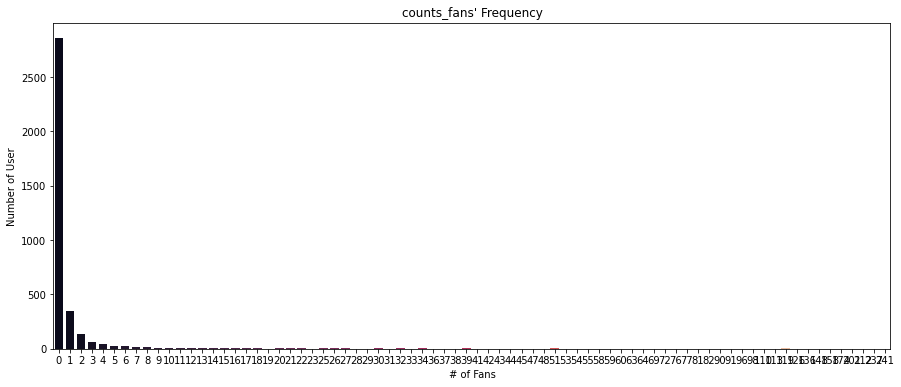

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x=fans_gb['counts_fans'], y=fans_gb['count'], palette="rocket")
plt.title("counts_fans' Frequency")
plt.xlabel("# of Fans")
plt.ylabel("Number of User")
plt.show()

In [22]:
# not a good feature, thus remove counts_fans
print("Before removal:",df.shape)
df.drop(columns = ['counts_fans'], axis = 1, inplace = True)
print("After removal:",df.shape)

Before removal: (3695, 42)
After removal: (3695, 41)


### 1.2.7 counts_g

In [23]:
# No specific description about this column, thus remove
print("Before removal:",df.shape)
df.drop(columns = ['counts_g'], axis = 1, inplace = True)
print("After removal:",df.shape)

Before removal: (3695, 41)
After removal: (3695, 40)


### 1.2.8 Gender - Gender Looking

In [24]:
df.groupby(['gender','genderLooking'])['userId'].count().reset_index().rename(columns = {'userId' : 'count'})

,gender,genderLooking,count
0,F,F,25
1,F,M,3317
2,F,both,16
3,F,none,337


### 1.2.9 Language

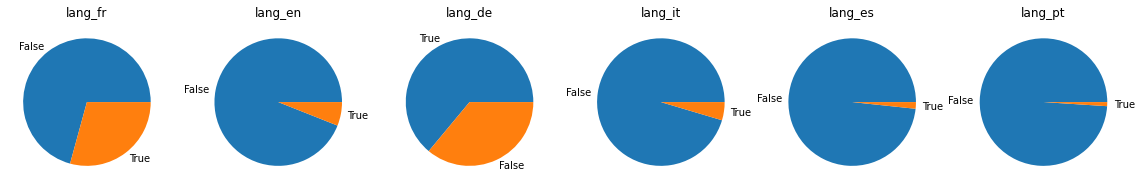

In [25]:
lang_col = ['lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt']
x_pos = 0
figure, axis = plt.subplots(1, 6, figsize = (20,6))
for c in lang_col:
  vc = pd.DataFrame(df[c].value_counts())
  axis[x_pos].pie(vc, labels = vc.index)
  axis[x_pos].set_title(c)
  x_pos += 1

plt.show()

In [26]:
# From the visualisation above, it seems that most users use lang_fr (France) or lang_de (German), thus keep these 2 columns, remove the rest
print("Before removal:",df.shape)
df.drop(columns = ['lang_en','lang_it','lang_es','lang_pt'], inplace = True)
print("After removal:",df.shape)
df.head(1)

Before removal: (3695, 40)
After removal: (3695, 36)


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,city,location,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.0,4,8279.0,239,True,True,True,CH,Rothenburg,Rümlang,175.0,0,0,0,1,0,0,0,1,False,True,0,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN


### 1.2.10 isFlirtstar, isHighlighted, isInfluencer, isMobile, isNew, isOnline, isVIP, crypt, isSystemProfile

**isFlirtstar**: Whether the user account that fetched the dataset "liked" this user's profile.

**isHighlighted**: Whether the user's profile is currently highlighted (at fetch time) [A user can use in-app currency to have one's profile temporarily highlighted and get more impressions/matches]

**isInfluencer**: Whether this is an influencer account

**isMobile**: Whether the user uses the mobile app 

**isNew**: The user account is recently created

**isOnline**: 1 if the user was connected at time of fetch

**isVip**: 1 if the user is VIP. [It was possible to buy a VIP status with real money. This status came with benefits.]

**crypt**: NA

**isSystemProfile**: Whether this user account is one of the website's own account (moderators, community managers, ...)

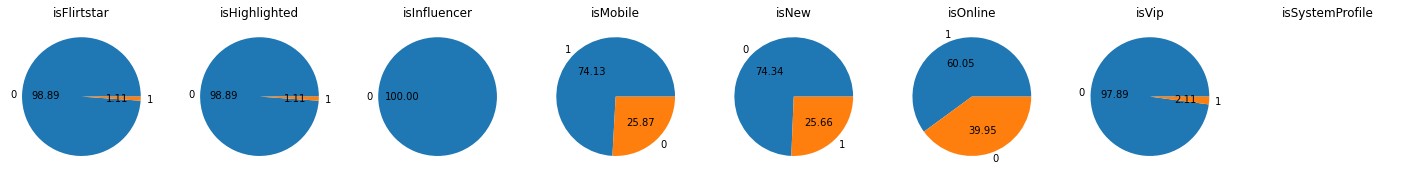

In [27]:
is_col = ['isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew', 'isOnline', 'isVip', 'isSystemProfile']
x_pos = 0
figure, axis = plt.subplots(1, 8, figsize = (25,7))
for c in is_col:
  vc = pd.DataFrame(df[c].value_counts())
  axis[x_pos].pie(vc, labels = vc.index, autopct='%.2f')
  axis[x_pos].set_title(c)
  x_pos += 1

plt.show()

Looking at the pie charts above, removing isFlirtstar, isHighlighted, isInfluencerm, isOnline, crypt, isSystemProfile because:
1. isFlirtstar: based on the user who fetched the data
2. isHighlighted, isOnline: real time data which now is a past data
3. isInfluencer: No pattern as all users are not influencer
4. crypt: no clear description, most probably crypt is enabled/or not
5. isSystemProfile: as no one is a system profile

In [28]:
print("Before removal:",df.shape)
df.drop(columns = ['isFlirtstar', 'isHighlighted', 'isInfluencer', 'isOnline', 'crypt', 'isSystemProfile'], inplace = True)
print("After removal:",df.shape)
df.head(1)

Before removal: (3695, 36)
After removal: (3695, 30)


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,city,location,distance,isMobile,isNew,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,freetext,whazzup,userId,pictureId
0,F,M,25,daeni,1.0,4,8279.0,239,True,True,True,CH,Rothenburg,Rümlang,175.0,1,0,0,1,False,True,0,1,2015-04-25T20:43:26Z,1.429995e+09,0,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575


Removing isNew = 1 because new users usually do not have pattern

In [29]:
print("Number of new users: {}".format(len(df[(df['isNew'] == 1)])))
df =  df[(df['isNew'] == 0)]
print("Number of new users: {}".format(len(df[(df['isNew'] == 1)])))

Number of new users: 948
Number of new users: 0


## 1.3 Get The Features Ready
+ some columns removal, encoding

In [30]:
def count_bool(df,col):
  count = 0
  
  for c in col:
    if df[c]:
      count += 1
 
  return count

### 1.3.1 flirtInterest
This influencse the recommendation and matching algorithm

**chat**: Whether the user indicated being in search for people to chat with

**friends**: Whether the user indicated being open to making friends.

**date**: Whether the user indicated being open to dating people. 


In [31]:
df['flirtInterests'] = df.apply(lambda x: count_bool(x, ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']), axis = 1)

In [32]:
# Removing 'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date'
print("Before removal:",df.shape)
df.drop(columns = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date'], inplace = True)
print("After removal:",df.shape)
df.head(1)

Before removal: (2747, 31)
After removal: (2747, 28)


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,country,city,location,distance,isMobile,isNew,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,freetext,whazzup,userId,pictureId,flirtInterests
0,F,M,25,daeni,1.0,4,8279.0,239,CH,Rothenburg,Rümlang,175.0,1,0,0,1,False,True,0,1,2015-04-25T20:43:26Z,1.429995e+09,0,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,3


### 1.3.2 Add Continent

In [33]:
loc = pd.read_csv("/content/drive/MyDrive/Loovo/countryContinent.csv", encoding= 'unicode_escape')
loc.head(1)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0


In [34]:
loc = loc[['code_2','country','continent']]

In [35]:
print("Before merging:",df.shape)
df = pd.merge(df, loc, left_on = 'country', right_on = 'code_2', how = 'left')
print("After merging:",df.shape)

# Removing city, location, distance
df.drop(columns = ['country_x','city','location','distance','code_2'], inplace = True)
df = df.rename(columns = {'country_y' : 'country'})
print("After removal:",df.shape)
df.head(1)

Before merging: (2747, 28)
After merging: (2747, 31)
After removal: (2747, 26)


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,isMobile,isNew,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,freetext,whazzup,userId,pictureId,flirtInterests,country,continent
0,F,M,25,daeni,1.0,4,8279.0,239,1,0,0,1,False,True,0,1,2015-04-25T20:43:26Z,1.429995e+09,0,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,3,Switzerland,Europe


### 1.3.3 lastOnlineDate & lastOnlineTime & birthd
**lastOnlineDate**: Last login time of the user. One login session can last several hours

**lastOnlineTime**: Last login time the user was connected, as timestamp

**birthd**: Whether the user's birthday is today (time of fetch)

In [36]:
df['lastOnlineDate'] = df['lastOnlineDate'].apply(pd.to_datetime, format='%Y-%m-%d')

# Remove lastOnlineTime, birthd since they don't mean anything for now
print("After merging:",df.shape)
df.drop(columns = ['lastOnlineTime', 'birthd'], inplace = True)
print("After removal:",df.shape)
df.head(1)

After merging: (2747, 26)
After removal: (2747, 24)


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,isMobile,isNew,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,freetext,whazzup,userId,pictureId,flirtInterests,country,continent
0,F,M,25,daeni,1.0,4,8279.0,239,1,0,0,1,False,True,0,1,2015-04-25 20:43:26+00:00,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,3,Switzerland,Europe


Assuming that the data was fetched at the maximum lastOnlineDate, then calculate how long had the users been idle to the day the data was fetched

In [37]:
fetched_day = df['lastOnlineDate'].max()
df['lastOnlineRecency'] = df.apply(lambda x: (fetched_day - x['lastOnlineDate']).days, axis = 1)
df.head(1)

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,isMobile,isNew,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,freetext,whazzup,userId,pictureId,flirtInterests,country,continent,lastOnlineRecency
0,F,M,25,daeni,1.0,4,8279.0,239,1,0,0,1,False,True,0,1,2015-04-25 20:43:26+00:00,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,3,Switzerland,Europe,7


### 1.3.4 freetext, whazzup

**freetext**: Another alternate free text

**whazzup**: User status message (main status message)



In [38]:
# fill null value with null value
print("Rows with null value in freetext:", len(df[(df['freetext'].isna())]))
df['freetext'].fillna('null', inplace = True)
print("Rows with null value in freetext:", len(df[(df['freetext'].isna())]))

Rows with null value in freetext: 2671
Rows with null value in freetext: 0


In [39]:
# fill null value with null value
print("Rows with null value in freetext:", len(df[(df['whazzup'].isna())]))
df['whazzup'].fillna('null', inplace = True)
print("Rows with null value in freetext:", len(df[(df['whazzup'].isna())]))

Rows with null value in freetext: 999
Rows with null value in freetext: 0


In [40]:
# Calculate the length of freetext and whazzup
df['freetext_len'] = df.apply(lambda x: 0 if x['freetext'] == 'null' else len(x['freetext']), axis = 1)
df['whazzup_len'] = df.apply(lambda x: 0 if x['whazzup'] == 'null' else len(x['whazzup']), axis = 1)

In [41]:
df.head(2)

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,isMobile,isNew,isVip,lang_count,lang_fr,lang_de,verified,shareProfileEnabled,lastOnlineDate,freetext,whazzup,userId,pictureId,flirtInterests,country,continent,lastOnlineRecency,freetext_len,whazzup_len
0,F,M,25,daeni,1.00,4,8279.0,239,1,0,0,1,False,True,0,1,2015-04-25 20:43:26+00:00,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,3,Switzerland,Europe,7,38,39
1,F,M,22,italiana 92,0.85,5,663.0,13,1,0,0,3,True,True,0,1,2015-04-26 09:19:35+00:00,null,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,3,Switzerland,Europe,7,0,13


## 1.4 Selecting Columns

In [42]:
df.columns

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses', 'isMobile',
       'isNew', 'isVip', 'lang_count', 'lang_fr', 'lang_de', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'freetext', 'whazzup',
       'userId', 'pictureId', 'flirtInterests', 'country', 'continent',
       'lastOnlineRecency', 'freetext_len', 'whazzup_len'],
      dtype='object')

In [43]:
df = df[['userId', 'age', 'gender', 'genderLooking', 'country','continent', # basic profile
         'lang_count', 'lang_fr', 'lang_de', # language competency
         'lastOnlineDate', 'lastOnlineRecency', # last online
         'counts_details', 'counts_pictures', 'counts_profileVisits', 'counts_kisses', 'flirtInterests', # profile counts on several data points
         'isMobile', 'isVip', 'verified','shareProfileEnabled', # account's data points
         'freetext', 'whazzup', 'freetext_len', 'whazzup_len']] # text data points

In [44]:
create_csv(df,"cleaned_data")

CSV export is done! File name: cleaned_data.csv


## 1.5 Features Correlation
is done to know which columns should be use for clustering

In [45]:
df_corr = df.copy()

## 1.5.1 Labels Encoding

In [46]:
bool_col = ['lang_fr', 'lang_de']

for c in bool_col:
  df_corr[c] = df_corr[c].apply(lambda x: int(x)) #, axis = 1)

In [47]:
cat_col = ['genderLooking','country','continent']

for c in cat_col:
  df_corr[c] = df_corr[c].astype('category').cat.codes

df_corr.head(1)

,userId,age,gender,genderLooking,country,continent,lang_count,lang_fr,lang_de,lastOnlineDate,lastOnlineRecency,counts_details,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests,isMobile,isVip,verified,shareProfileEnabled,freetext,whazzup,freetext_len,whazzup_len
0,4e3842f79b70e7ea57000064,25,F,1,22,3,1,0,1,2015-04-25 20:43:26+00:00,7,1.0,4,8279.0,239,3,1,0,0,1,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,38,39


In [48]:
create_csv(df_corr,"corr_data")

CSV export is done! File name: corr_data.csv


## 1.5.2 Correlation

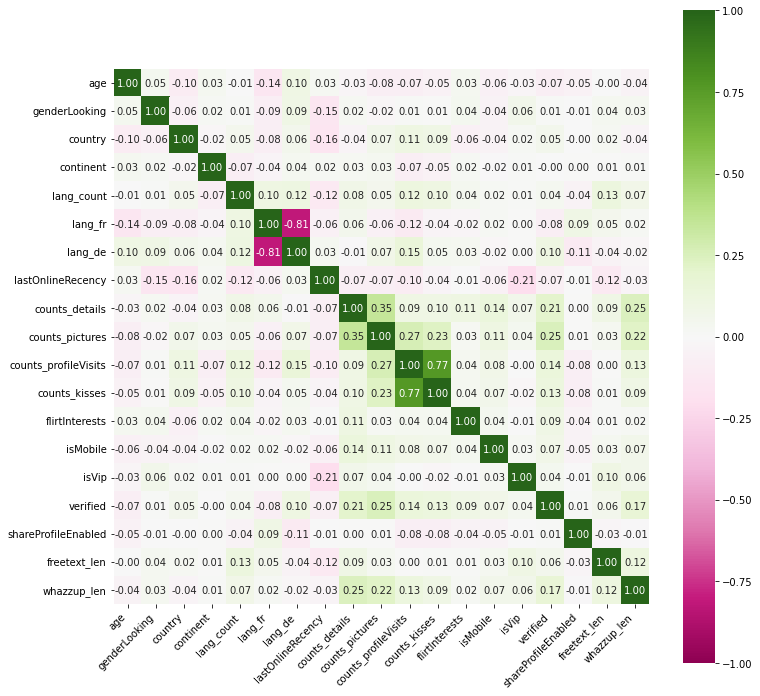

In [49]:
corr = df_corr.iloc[:,1:].corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True, fmt='.2f',
    cmap="PiYG",
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.show()

Based on the heatmap above, count_kisses and counts_profileVisits have quite high correlation, thus kisses is chosen as a user has higher possibility to talk if other users like her.

We will be doing experiments to determine which features produce the best clustering in the next section

# 2. K-means Clustering

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2.1 Features Selection Experiment Using Elbow Method & Silhouette Scores

In [51]:
df_corr.columns

Index(['userId', 'age', 'gender', 'genderLooking', 'country', 'continent',
       'lang_count', 'lang_fr', 'lang_de', 'lastOnlineDate',
       'lastOnlineRecency', 'counts_details', 'counts_pictures',
       'counts_profileVisits', 'counts_kisses', 'flirtInterests', 'isMobile',
       'isVip', 'verified', 'shareProfileEnabled', 'freetext', 'whazzup',
       'freetext_len', 'whazzup_len'],
      dtype='object')

In [52]:
features19 = ['age', 'genderLooking', 'country', 'continent', 'lang_count',
              'lang_fr', 'lang_de', 'lastOnlineRecency',
              'counts_details', 'counts_pictures', 'counts_kisses', 'flirtInterests',
              'isMobile', 'isVip', 'verified',
              'shareProfileEnabled', 'freetext_len', 'whazzup_len']

# excluding detailed features e.g. language
features16 = ['age', 'genderLooking', 'country', 'continent', 'lang_count', 'lastOnlineRecency',
              'counts_details', 'counts_pictures', 'counts_kisses', 'flirtInterests',
              'isMobile', 'isVip', 'verified',
              'shareProfileEnabled', 'freetext_len', 'whazzup_len']

# excluding age, country, continent from features16
features13 = ['genderLooking', 'lang_count', 'lastOnlineRecency',
              'counts_details', 'counts_pictures', 'counts_kisses', 'flirtInterests',
              'isMobile', 'isVip', 'verified',
              'shareProfileEnabled', 'freetext_len', 'whazzup_len']

# excluding all the is_something + verified as it is just yes or no, genderLooking & flirtInterests as it is categorical
features7 = ['lang_count', 'lastOnlineRecency',
             'counts_details', 'counts_pictures', 'counts_kisses',
             'freetext_len', 'whazzup_len']

# excluding freetext_len as it is not the main status and more users leave it blank
features6 = ['lang_count', 'lastOnlineRecency', 'counts_details',
             'counts_pictures', 'counts_kisses', 'whazzup_len']

# exlcluding lastOnlineRecency
features5 = ['lang_count', 'counts_details', 'counts_pictures', 
             'counts_kisses', 'whazzup_len']             

f_collection = [features19, features16, features13, features7, features6, features5]


Number of features : 18
WCSS:	 [50995717.815662146, 27674035.403905068, 16755254.824317846, 12213919.375548586, 9004727.992558802, 7347905.715347611, 6190637.067822064, 5465800.334230735, 4716519.394836752]
Sil:	 [0.8141074918846369, 0.6691235305727778, 0.6210300363369912, 0.5419798939234974, 0.5222826111499288, 0.5109088863100586, 0.41700048704767134, 0.40788915936291475, 0.40869977167866006]


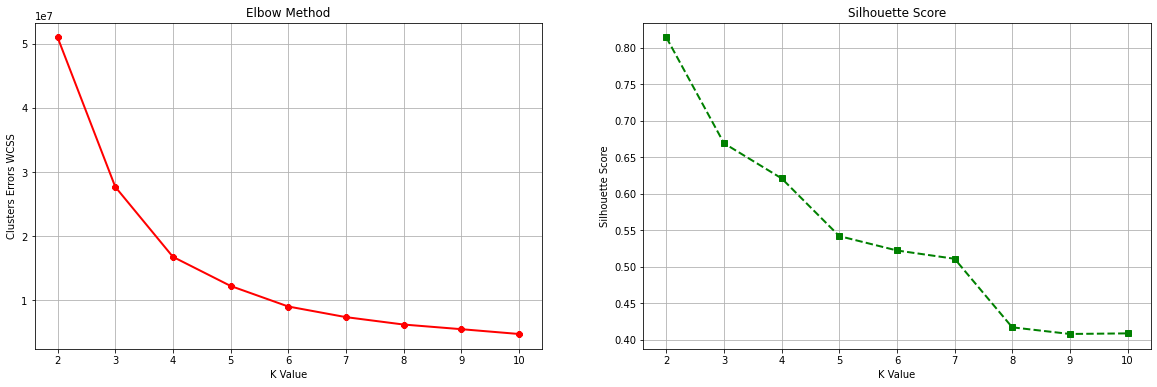

<Figure size 864x432 with 0 Axes>


Number of features : 16
WCSS:	 [50994502.245283335, 27672821.355053905, 16754039.918032618, 12214588.473473445, 9003622.172587074, 7346693.887373477, 6189425.986303996, 5465482.531835096, 4715167.432898587]
Sil:	 [0.8141163516730211, 0.6691492207878018, 0.6210671039284472, 0.5406918294871169, 0.5225410373191592, 0.5109805416742643, 0.4171028931616303, 0.40900441093993234, 0.4071868913797786]


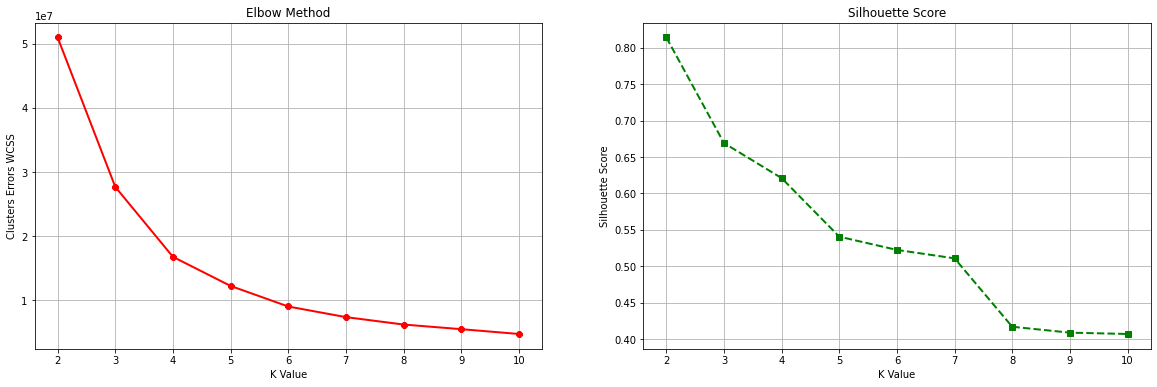

<Figure size 864x432 with 0 Axes>


Number of features : 13
WCSS:	 [50862938.14563807, 27541804.810983293, 16623166.778381493, 12082976.413541336, 8874125.931504272, 7235810.988515479, 6060464.645008388, 5307707.006347762, 4586608.788822758]
Sil:	 [0.8150395929934382, 0.6718147790473515, 0.6254190157033841, 0.547523565199604, 0.5290894824250587, 0.5184084139318261, 0.42792419693448813, 0.42826281215927936, 0.4200167037031804]


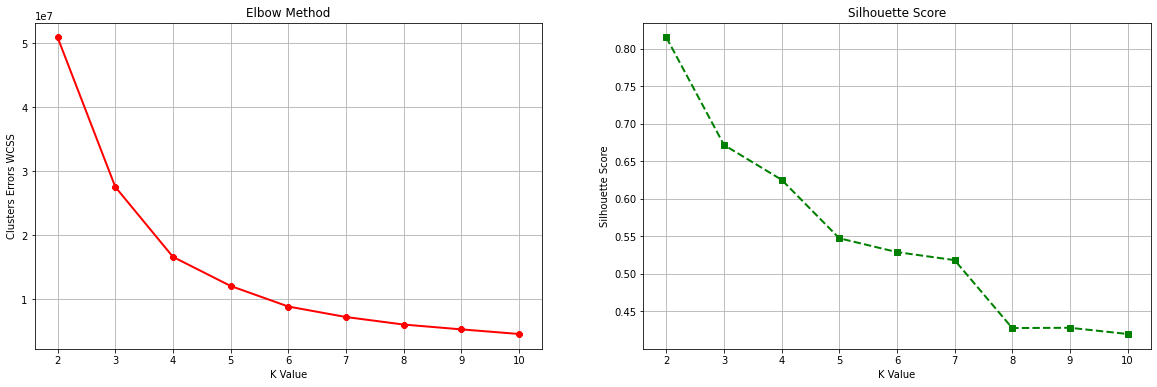

<Figure size 864x432 with 0 Axes>


Number of features : 7
WCSS:	 [50858345.17112317, 27537219.572529186, 16620049.916889124, 12078247.659410164, 8869663.869862713, 7231236.287127204, 6053895.834276596, 5303136.413973993, 4582184.587862987]
Sil:	 [0.8150752377281372, 0.6719187257032367, 0.6243665155681878, 0.548751914457029, 0.5296369055796148, 0.5187089873508757, 0.43317903853690537, 0.4287141333431088, 0.422907179294918]


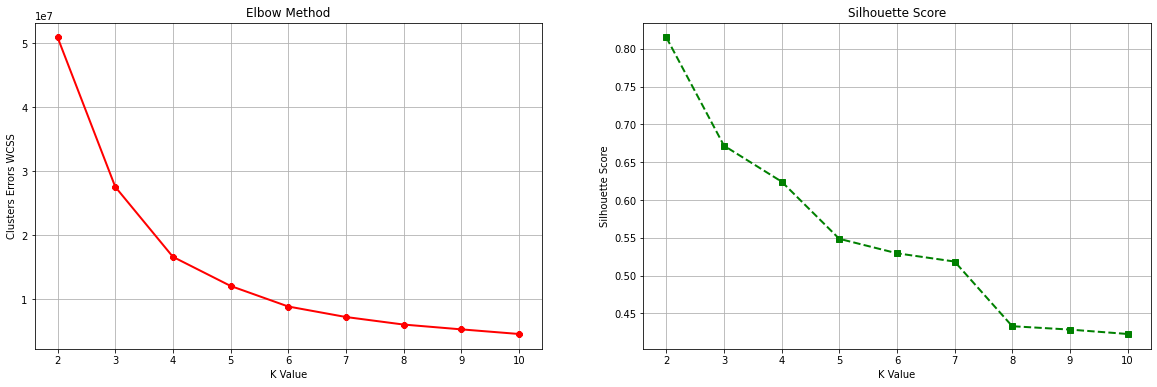

<Figure size 864x432 with 0 Axes>


Number of features : 6
WCSS:	 [50461830.2788104, 27140928.099155854, 16221884.127801916, 11682033.00015776, 8473033.421306456, 6835071.319287708, 5660526.453320624, 4906027.400266306, 4188280.192873682]
Sil:	 [0.8163597560121907, 0.6752842598549501, 0.6295819179592108, 0.5560810706630358, 0.5356672881233849, 0.5248949107173722, 0.43412265821502655, 0.4385662796978505, 0.42557360275141964]


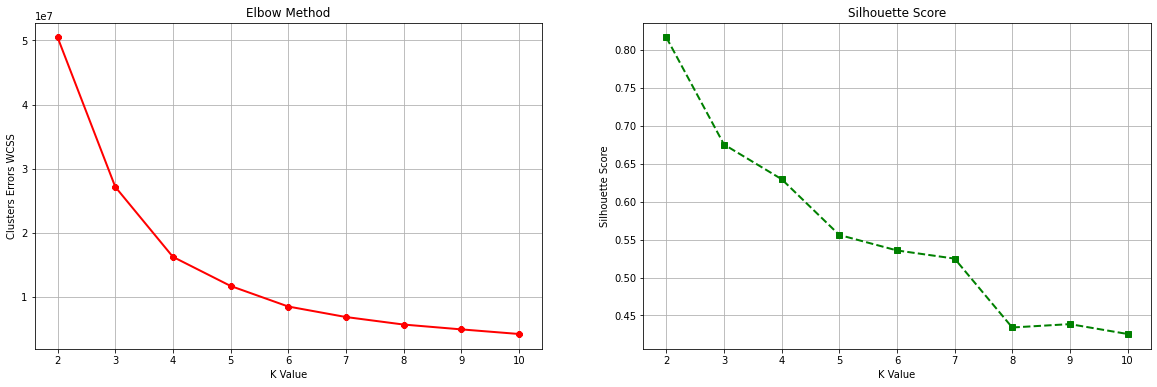

<Figure size 864x432 with 0 Axes>


Number of features : 5
WCSS:	 [50213893.8229132, 26894325.708673593, 15977418.208767254, 11438044.344776738, 8227578.2111757565, 6594768.482417075, 5415490.604115918, 4663203.563062333, 3941670.8301440487]
Sil:	 [0.818192446108955, 0.6806096641143254, 0.6365017302655428, 0.5647042175251894, 0.5497461743191636, 0.5137426283788236, 0.45646946105753644, 0.45684631396607783, 0.456127865055167]


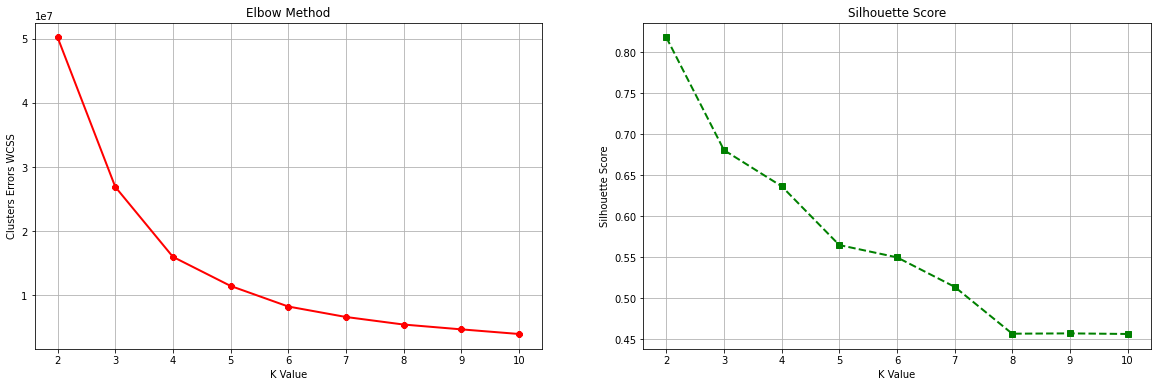

<Figure size 864x432 with 0 Axes>

In [53]:
for f in f_collection:
  # select df
  df_elbow = df_corr[f]

  wcss = []
  sil_kmeans = []

  for k in range(2,11):
      # K-Means Clustering:
      kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 0)
      kmeans.fit(df_elbow)
      
      # Inertia and Silhouette Score for Clusters using K-Means:
      in_km = kmeans.inertia_
      wcss.append(in_km)
      sil_km = silhouette_score(df_elbow, kmeans.labels_)
      sil_kmeans.append(sil_km)
  
  # Visualisation
  print('\nNumber of features :', len(f))
  print('WCSS:\t',wcss)
  print('Sil:\t',sil_kmeans)
  figure, axis = plt.subplots(1, 2, figsize=(20,6))
  plt.figure(figsize=(12,6))

  axis[0].grid()
  axis[0].plot(range(2,11), wcss, linewidth=2, color="red", marker ="8")
  axis[0].set_title('Elbow Method')
  axis[0].set_xlabel('K Value')
  axis[0].set_ylabel('Clusters Errors WCSS')

  axis[1].grid()
  axis[1].plot(range(2,11), sil_kmeans, linewidth=2, color='green', marker='s', linestyle="--")
  axis[1].set_title('Silhouette Score')
  axis[1].set_xlabel('K Value')
  axis[1].set_ylabel('Silhouette Score')
  
  plt.show()

## 2.2 Clustering Application
Based on the WCSS and silhouette score, we will be using number of features = 5 as it has the highest silhouette score and k = 4 or 5 as the bend is there

In [54]:
df_clustering = df[features5]

In [55]:
KM_4 = KMeans(n_clusters = 4, init='k-means++', random_state = 0).fit(df_clustering)
KM_5 = KMeans(n_clusters = 5, init='k-means++', random_state = 0).fit(df_clustering)

In [56]:
df_clustering.insert(0,'userId',df['userId'])
df_clustering['cluster_4'] = KM_4.labels_
df_clustering['cluster_5'] = KM_5.labels_
df_clustering.head(1)

,userId,lang_count,counts_details,counts_pictures,counts_kisses,whazzup_len,cluster_4,cluster_5
0,4e3842f79b70e7ea57000064,1,1.0,4,239,39,0,0


In [57]:
df['cluster_4'] = KM_4.labels_
df['cluster_5'] = KM_5.labels_
df.head(1)

,userId,age,gender,genderLooking,country,continent,lang_count,lang_fr,lang_de,lastOnlineDate,lastOnlineRecency,counts_details,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests,isMobile,isVip,verified,shareProfileEnabled,freetext,whazzup,freetext_len,whazzup_len,cluster_4,cluster_5
0,4e3842f79b70e7ea57000064,25,F,M,Switzerland,Europe,1,False,True,2015-04-25 20:43:26+00:00,7,1.0,4,8279.0,239,3,1,0,0,1,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,38,39,0,0


In [58]:
create_csv(df_clustering, "KM_5features")
create_csv(df, "KM_detailed")

CSV export is done! File name: KM_5features.csv
CSV export is done! File name: KM_detailed.csv


# 3. Analysis/Profiling
The goal of Profiling is to be able to differentiate between the groups with the proper distinction that means each group has some unique characteristics about it and then that cluster is the ideal solution to segment the values.

Steps to do Profiling are:

1. Find the count of each segment (value_counts) -> that gives how many observations or records are present in each segment

2. For each of the variable: find the overall average and the individual segment-wise average

3. Perform the above two steps for each K value to find the best profiling

## 3.1 Step 1: Count how many users in each segment

In [59]:
pd.Series.sort_index(df_clustering.cluster_4.value_counts())

0     529
1     142
2    2026
3      50
Name: cluster_4, dtype: int64

In [60]:
pd.Series.sort_index(df_clustering.cluster_5.value_counts())

0     641
1     106
2    1737
3     227
4      36
Name: cluster_5, dtype: int64

In [61]:
size = pd.concat([pd.Series(df_clustering.cluster_4.size), pd.Series.sort_index(df_clustering.cluster_4.value_counts()), pd.Series.sort_index(df_clustering.cluster_5.value_counts())])

# Segment Size
seg_size = pd.DataFrame(size, columns=['segment_size'])

# Segment %Distribtuion:
seg_pct = pd.DataFrame(round((size/df_clustering.cluster_4.size)*100,2), columns=['segment_percentage'])

# Concatenating the Segment Size and Segment Percentage:
pd.concat([seg_size.T, seg_pct.T], axis=0)

,0,0,1,2,3,0,1,2,3,4
segment_size,2747.0,529.00,142.00,2026.00,50.00,641.00,106.00,1737.00,227.00,36.00
segment_percentage,100.0,19.26,5.17,73.75,1.82,23.33,3.86,63.23,8.26,1.31


## 3.2 Step 2: Finding average/median of features for each cluster

In [62]:
df_clustering.iloc[:,1:6].apply(np.mean).round(2).T

lang_count           1.13
counts_details       0.59
counts_pictures      4.21
counts_kisses      151.23
whazzup_len         20.37
dtype: float64

In [63]:
df_clustering.iloc[:,1:6].apply(np.median).round(2).T

lang_count          1.00
counts_details      0.65
counts_pictures     4.00
counts_kisses      67.00
whazzup_len         7.00
dtype: float64

In [64]:
df_clustering.groupby('cluster_4').apply(np.mean).round(2).T

cluster_4,0,1,2,3
lang_count,1.19,1.30,1.10,1.28
counts_details,0.64,0.66,0.57,0.68
counts_pictures,4.97,5.46,3.88,5.78
counts_kisses,263.64,710.92,52.82,1359.94
whazzup_len,24.92,25.61,18.77,22.14
cluster_4,0.00,1.00,2.00,3.00
cluster_5,1.00,1.70,1.71,3.16


In [65]:
df_clustering.groupby('cluster_5').apply(np.mean).round(2).T

cluster_5,0,1,2,3,4
lang_count,1.18,1.28,1.08,1.25,1.33
counts_details,0.61,0.63,0.57,0.68,0.68
counts_pictures,4.96,5.73,3.70,5.00,5.78
counts_kisses,176.08,835.61,39.88,405.11,1465.22
whazzup_len,23.16,24.17,18.17,26.89,24.72
cluster_4,0.90,1.26,2.00,0.22,3.00
cluster_5,0.00,1.00,2.00,3.00,4.00


In [66]:
# Concatinating the above two averages:

profiling  = pd.concat([df_clustering.iloc[:,1:].apply(lambda x: x.mean()).T, 
                df_clustering.iloc[:,1:].groupby('cluster_4').apply(lambda x: x.mean()).T,
                df_clustering.iloc[:,1:].groupby('cluster_5').apply(lambda x: x.mean()).T], axis=1)

profiling_final = pd.concat([seg_size.T, seg_pct.T, profiling], axis=0)
profiling_final = profiling_final.reset_index()
profiling_final.columns = ['Metrics','Overall', 
                           'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                           'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5']
profiling_final

,Metrics,Overall,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5
0,segment_size,2747.000000,529.000000,142.000000,2026.000000,50.0000,641.000000,106.000000,1737.000000,227.000000,36.000000
1,segment_percentage,100.000000,19.260000,5.170000,73.750000,1.8200,23.330000,3.860000,63.230000,8.260000,1.310000
2,lang_count,1.128504,1.194707,1.295775,1.095755,1.2800,1.180967,1.283019,1.080023,1.246696,1.333333
3,counts_details,0.591926,0.644045,0.656972,0.571496,0.6836,0.609314,0.632925,0.570006,0.677533,0.679444
4,counts_pictures,4.209319,4.973535,5.457746,3.883514,5.7800,4.960998,5.726415,3.704088,4.995595,5.777778
5,counts_kisses,151.227885,263.638941,710.915493,52.818855,1359.9400,176.079563,835.613208,39.880253,405.114537,1465.222222
6,whazzup_len,20.370950,24.924386,25.612676,18.770977,22.1400,23.162246,24.169811,18.166379,26.894273,24.722222
7,cluster_4,1.581361,0.000000,1.000000,2.000000,3.0000,0.901716,1.264151,2.000000,0.220264,3.000000
8,cluster_5,1.603568,1.003781,1.704225,1.714709,3.1600,0.000000,1.000000,2.000000,3.000000,4.000000


In [67]:
create_csv(profiling_final, "pivoting")

CSV export is done! File name: pivoting.csv
